Autore kopurua grafoan: 1843
Elkarlan kopurua grafoan: 3215

Autore kopurua grafoan: 1843

Elkarlan kopurua grafoan: 3215


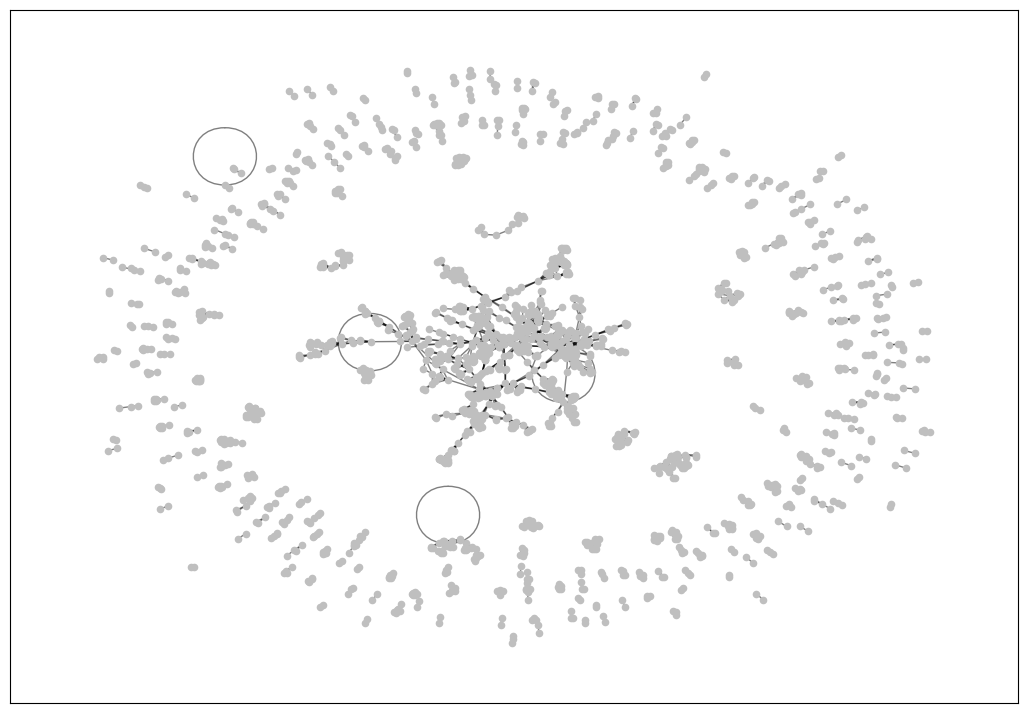

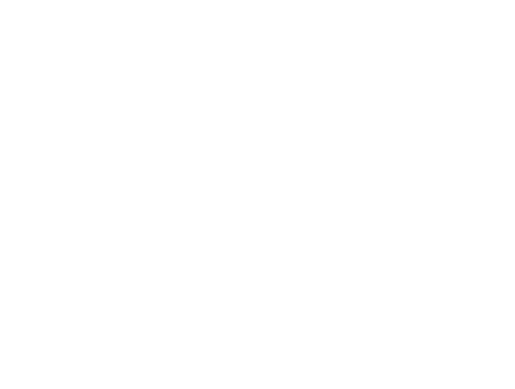

Autore kopurua grafoan: 1843
Elkarlan kopurua grafoan: 3215


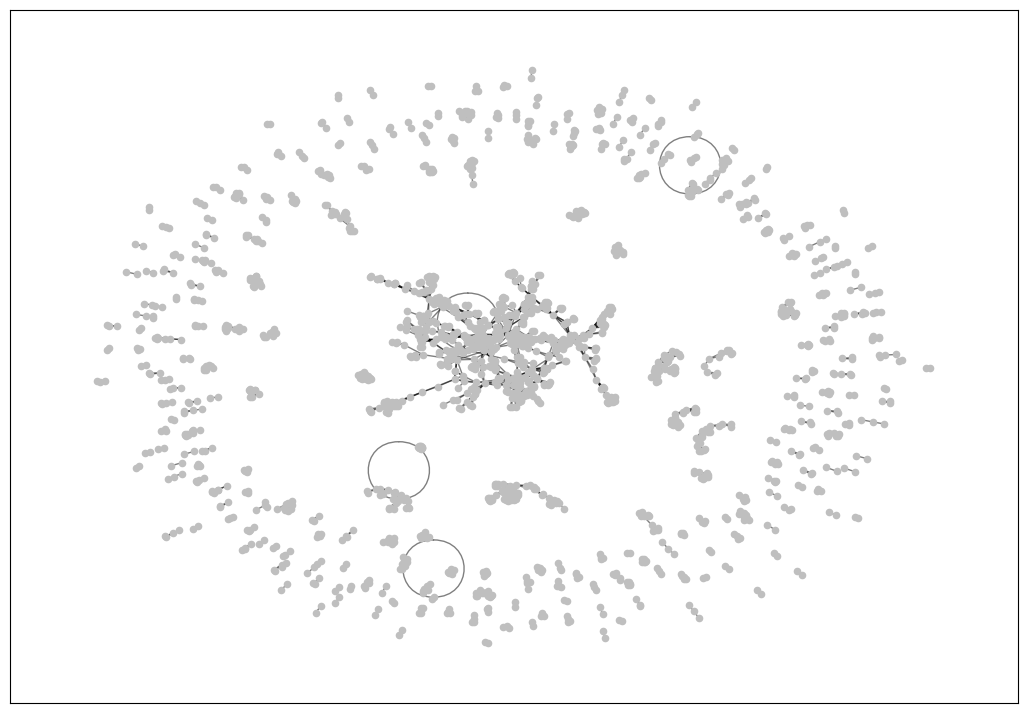

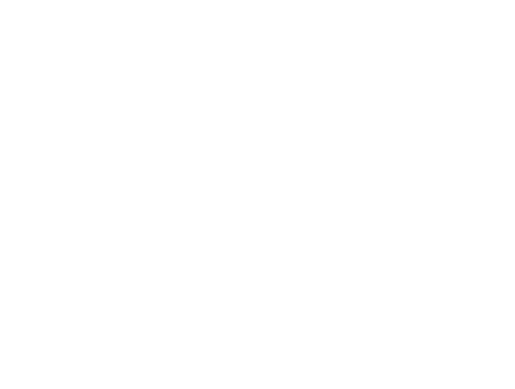

Autore kopurua grafoan: 1843
Elkarlan kopurua grafoan: 3215
Autore kopurua grafoan: 1843
Elkarlan kopurua grafoan: 3215
Autore kopurua grafoan: 1843
Elkarlan kopurua grafoan: 3215


In [2]:
from itertools import product
from ipynb.fs.defs.CDP_Sarrera_Ikasle import sortu_grafoa 
from ipynb.fs.defs.CDP_Sarrera_Ikasle import bistaratu_grafoa
from ipynb.fs.defs.CDP_1_fasea_Ikasle import kalkulatuHasierakoMAT
from ipynb.fs.defs.CDP_1_fasea_Ikasle import modularitateaOPT
import random as rm
import copy as cp
from pdb import set_trace



In [3]:
G = sortu_grafoa()
m = G.size(weight='weight')
kalkulatuHasierakoMAT(G)

Autore kopurua grafoan: 1843
Elkarlan kopurua grafoan: 3215


In [6]:
def EDA(G,k,poplen,iterkop):
    populazioa = [hasieratu(G,k) for i in range(poplen)]
    for iterazio in range(iterkop):
        populazioa = sorted(populazioa, key=lambda x: modularitateaOPT(G,x), reverse=True)
        popOpt = populazioa[0:k//2]
        probVec = probabilitateVec(G,k,popOpt)
        if iterazio % 10 == 0:
            print("ITERAZIOA: " + str(iterazio))
            print("POPULAZIOAREN BALIO HOBERENA: "+ str(modularitateaOPT(G,populazioa[0])))
        for i in range(poplen):
            for j in range(k):
                aukera = rm.random()
                zenbat = 0
                for node in G:
                    zenbat+=probVec[j][node]
                    if zenbat >= aukera:
                        populazioa[i][node] = j
                        break

    return populazioa[0]

def probabilitateVec(G,k,populazioa):
    dicHuts = {}
    for node in G:
        dicHuts[node]=0
    probMat = [cp.deepcopy(dicHuts) for j in range(k)]
    for i in range(len(populazioa)):
        for node in G:
            probMat[populazioa[i][node]][node] += 1/len(populazioa) 
    return probMat

def hasieratu(G, k):
    partizioaAusaz = {}
    for node in G:
        partizioaAusaz[node]=rm.randrange(k)
    return partizioaAusaz
#aukera = EDA(G,200,1000,1000) 0.011657931788842184
aukera = EDA(G,200,9000,500)
print(modularitateaOPT(G,aukera))


ITERAZIOA: 0
POPULAZIOAREN BALIO HOBERENA: 0.012197568748751646


KeyboardInterrupt: 

In [ ]:
def randomSearch(G,k,iterazioak):
    maxB = -float('inf')
    maxP = []
    for iterazio in range(iterazioak):
        partizioa = hasieratu(G,k)
        partizioaB = modularitateaOPT(G,partizioa)
        if maxB < partizioaB:
            maxP = cp.deepcopy(partizioa)
            maxB = partizioaB
        if iterazio % 100 == 0:
            print(iterazio)
    print(maxB)
    return maxP


randomSearch(G,200,50000) 
            